# Crime Data Analysis
This notebook performs data cleaning and analysis on a crime dataset. 
The steps include importing data, handling missing values, removing duplicates, 
and analyzing the distribution of crime categories and resolutions.

## Import Libraries and Load Dataset

In [239]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearnex import patch_sklearn
patch_sklearn()

import warnings
warnings.filterwarnings('ignore')
crime_data = pd.read_csv('Crime_Dataset.csv')
crime_data

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
669737,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
669738,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
669739,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
669740,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


## Inspect Dataset

In [240]:
print(crime_data.info())
print(crime_data.isnull().sum())
print(crime_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669742 entries, 0 to 669741
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       669742 non-null  object 
 1   Category    669742 non-null  object 
 2   Descript    669742 non-null  object 
 3   DayOfWeek   669742 non-null  object 
 4   PdDistrict  669742 non-null  object 
 5   Resolution  669742 non-null  object 
 6   Address     669742 non-null  object 
 7   Longitude   669742 non-null  float64
 8   Latitude    669742 non-null  float64
dtypes: float64(2), object(7)
memory usage: 46.0+ MB
None
Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
Longitude     0
Latitude      0
dtype: int64
0


## Remove Duplicates

In [241]:
crime_data.drop_duplicates(inplace=True)

## Correct Column Names

In [242]:
# Correct the order of Longitude and Latitude
# no need to run this again. 
crime_data.rename(columns={'Latitude (Y)': 'Longitude', 'Longitude (X)': 'Latitude'}, inplace=True)
crime_data.to_csv('Crime_Dataset.csv', index=False)

## Handle Missing Values

In [243]:

crime_data.replace('NONE', np.nan, inplace=True)
crime_data = crime_data.dropna()


## Final Dataset Overview

In [244]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248467 entries, 0 to 669736
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       248467 non-null  object 
 1   Category    248467 non-null  object 
 2   Descript    248467 non-null  object 
 3   DayOfWeek   248467 non-null  object 
 4   PdDistrict  248467 non-null  object 
 5   Resolution  248467 non-null  object 
 6   Address     248467 non-null  object 
 7   Longitude   248467 non-null  float64
 8   Latitude    248467 non-null  float64
dtypes: float64(2), object(7)
memory usage: 19.0+ MB


## Display Cleaned Dataset

In [245]:
crime_data

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
15,2015-05-13 21:40:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,BAYVIEW,"ARREST, BOOKED",MENDELL ST / HUDSON AV,-122.386401,37.738983
27,2015-05-13 20:50:00,NON-CRIMINAL,"CIVIL SIDEWALKS, CITATION",Wednesday,MISSION,"ARREST, BOOKED",400 Block of CASTRO ST,-122.435150,37.761760
...,...,...,...,...,...,...,...,...,...
669730,2003-01-06 01:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Monday,RICHMOND,"ARREST, CITED",1000 Block of 22ND AV,-122.391668,37.757793
669731,2003-01-06 01:30:00,TRESPASS,TRESPASSING,Monday,RICHMOND,"ARREST, CITED",1000 Block of 22ND AV,-122.391668,37.757793
669734,2003-01-06 00:40:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,NORTHERN,"ARREST, CITED",POLK ST / CALIFORNIA ST,-122.420692,37.790577
669735,2003-01-06 00:31:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,RICHMOND,"ARREST, CITED",CLEMENT ST / 14TH AV,-122.472985,37.782552


## Analyze Crime Categories

In [246]:
crime_data['Category'].value_counts()

Category
OTHER OFFENSES            81137
WARRANTS                  35969
DRUG/NARCOTIC             32265
NON-CRIMINAL              21444
LARCENY/THEFT             16386
MISSING PERSON            14764
BURGLARY                   5343
WEAPON LAWS                4901
ROBBERY                    4830
VANDALISM                  4743
TRESPASS                   4632
VEHICLE THEFT              4064
FRAUD                      3697
SUSPICIOUS OCC             3477
FORGERY/COUNTERFEITING     3161
DISORDERLY CONDUCT         2666
STOLEN PROPERTY            1704
RUNAWAY                    1123
KIDNAPPING                 1121
EMBEZZLEMENT                304
ARSON                       248
RECOVERED VEHICLE           190
BRIBERY                     165
BAD CHECKS                   76
EXTORTION                    57
Name: count, dtype: int64

## Analyze Resolutions

In [247]:
crime_data['Resolution'].value_counts()

Resolution
ARREST, BOOKED                            136428
ARREST, CITED                              59067
LOCATED                                    15060
PSYCHOPATHIC CASE                          12798
UNFOUNDED                                   7753
JUVENILE BOOKED                             3645
NOT PROSECUTED                              3131
JUVENILE CITED                              2376
COMPLAINANT REFUSES TO PROSECUTE            2151
PROSECUTED BY OUTSIDE AGENCY                2013
DISTRICT ATTORNEY REFUSES TO PROSECUTE      1753
EXCEPTIONAL CLEARANCE                        960
JUVENILE ADMONISHED                          907
JUVENILE DIVERTED                            285
CLEARED-CONTACT JUVENILE FOR MORE INFO       110
PROSECUTED FOR LESSER OFFENSE                 30
Name: count, dtype: int64

In [248]:
# Extract time-based features (assuming a 'Date' column exists)
crime_data['Dates'] = pd.to_datetime(crime_data['Dates'])
crime_data['Hour'] = crime_data['Dates'].dt.hour
crime_data['DayOfWeek'] = crime_data['Dates'].dt.dayofweek
crime_data['Month'] = crime_data['Dates'].dt.month
crime_data['Year'] = crime_data['Dates'].dt.year
crime_data = crime_data.drop(columns=['Dates'])


# Convert categorical variables to numerical using Label Encoding
cate = crime_data.select_dtypes(include=['object']).columns
label_encoders = {}
ltc = {}
for col in cate:
    le = LabelEncoder()
    crime_data[col] = le.fit_transform(crime_data[col])
    label_encoders[col] = le
    ltc[le] = col


crime_data['Crime_Occurred'] = 1
non_criminal_label = label_encoders['Category'].transform(['NON-CRIMINAL'])[0]
crime_data.loc[crime_data['Category'] == non_criminal_label, 'Crime_Occurred'] = 0
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Latitude', 'Longitude', 'Hour', 'DayOfWeek', 'Month']
crime_data[numerical_cols] = scaler.fit_transform(crime_data[numerical_cols])

crime_data


,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Longitude,Latitude,Hour,Month,Year,Crime_Occurred
0,23,550,-0.465499,4,0,14342,-0.198467,0.003574,1.528523,-0.387214,2015,1
1,14,511,-0.465499,4,0,14342,-0.198467,0.003574,1.528523,-0.387214,2015,1
2,14,511,-0.465499,4,0,16281,-0.147952,0.050946,1.528523,-0.387214,2015,1
15,14,510,-0.465499,0,0,13872,1.106506,-0.061780,1.211299,-0.387214,2015,1
27,13,138,-0.465499,3,0,7503,-0.504411,-0.019986,1.052687,-0.387214,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
669730,21,333,-1.488964,6,1,1922,0.932441,-0.027264,-1.960941,-1.553406,2003,1
669731,20,517,-1.488964,6,1,1922,0.932441,-0.027264,-1.960941,-1.553406,2003,1
669734,14,186,-1.488964,4,1,14810,-0.026633,0.032894,-2.119553,-1.553406,2003,1
669735,14,186,-1.488964,6,1,11001,-1.754659,0.018169,-2.119553,-1.553406,2003,1


# Modling
 - Crime Occurrence Prediction 
 - Crime Hotspot Detection

## Crime Occurrece Predictoin

In [249]:
#Train-Test Split
X = crime_data.drop(['Crime_Occurred'], axis=1)
y = crime_data['Crime_Occurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [250]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [251]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4194
           1       1.00      1.00      1.00     45500

    accuracy                           1.00     49694
   macro avg       1.00      1.00      1.00     49694
weighted avg       1.00      1.00      1.00     49694



In [255]:
# Define parameter grid with fewer combinations for optimization
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with reduced verbosity and parallel jobs
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='roc_auc',
                           verbose=0,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


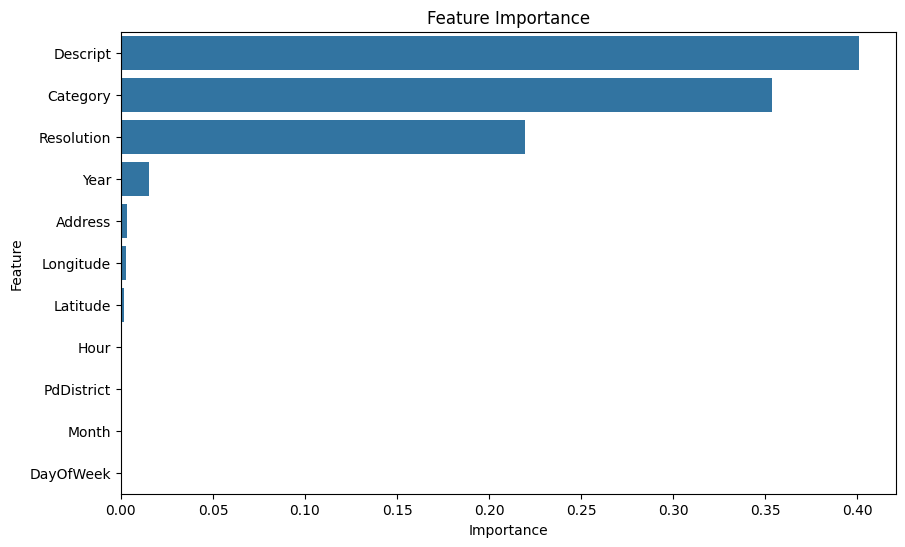

In [257]:
# Feature importance
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## Crime Hotspot Detection

In [ ]:
from sklearn.cluster import DBSCAN
X_train_unsupervised, X_test_unsupervised = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise} ({n_noise/len(df_clustered)*100:.2f}%)")

Number of clusters: 5305
Number of noise points: 9314 (3.75%)


In [256]:
# Print cluster statistics
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f"\nNumber of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise} ({n_noise/len(coords)*100:.2f}%)")

# Show cluster sizes
print("\nCluster sizes:")
print(pd.Series(clusters).value_counts().sort_index())


Number of clusters: 5305
Number of noise points: 9314 (3.75%)

Cluster sizes:
-1       9314
 0         77
 1         16
 2         32
 3        515
         ... 
 5300       5
 5301       7
 5302       5
 5303       6
 5304       6
Name: count, Length: 5306, dtype: int64
